In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe

<bound method NDFrame.describe of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [ ]:
tc=df.corr()

<ipython-input-4-be51bd3179c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc=df.corr()


Text(0, 0.5, 'Spending Score')

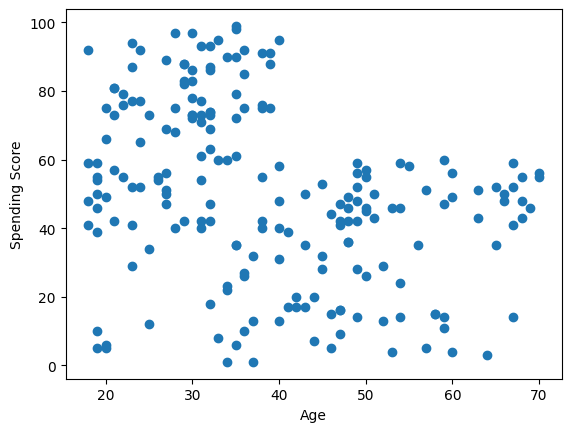

In [ ]:
plt.scatter(df.Age,df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')

In [ ]:
columns_to_cluster = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
wcss = []

for i in range(1, 15):
    km = KMeans(n_clusters=i)
    km.fit(df[columns_to_cluster])
    wcss.append(km.inertia_)

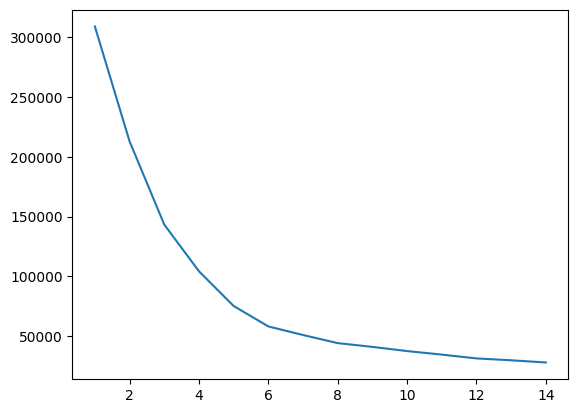

In [ ]:
plt.plot(range(1,15), wcss)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

In [ ]:
columns_to_cluster = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

In [ ]:
km = KMeans(n_clusters=5)

In [ ]:
y_predicted = km.fit_predict(df[columns_to_cluster])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 1, 3, 0, 3, 0, 3, 1, 3, 0, 3,
       1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 0,
       1, 3, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 4, 2, 1, 2, 4, 2,
       0, 2, 0, 2, 4, 2, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,0.387755,0
1,2,Male,0.057692,0.000000,0.816327,3
2,3,Female,0.038462,0.008197,0.051020,0
3,4,Female,0.096154,0.008197,0.775510,3
4,5,Female,0.250000,0.016393,0.397959,0


In [ ]:
km.cluster_centers_

array([[0.17988782, 0.29166667, 0.42665816],
       [0.72327249, 0.2775771 , 0.41075752],
       [0.28605769, 0.58278689, 0.82168367],
       [0.13986014, 0.08792846, 0.79962894],
       [0.4633995 , 0.61501851, 0.16886109]])

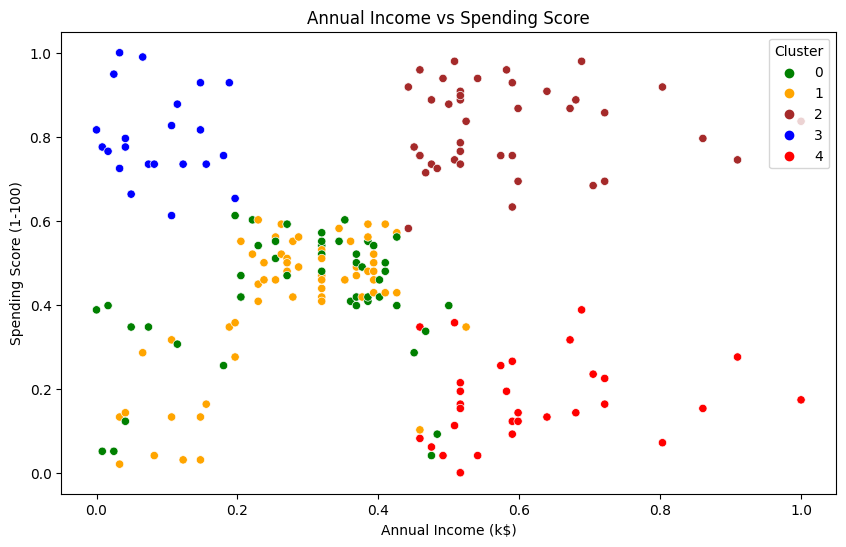

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='cluster',
    palette=['green', 'orange', 'brown', 'blue', 'red'],
    legend='full',
    data=df
)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.legend(title='Cluster', loc='upper right')
plt.show()

<Axes: >

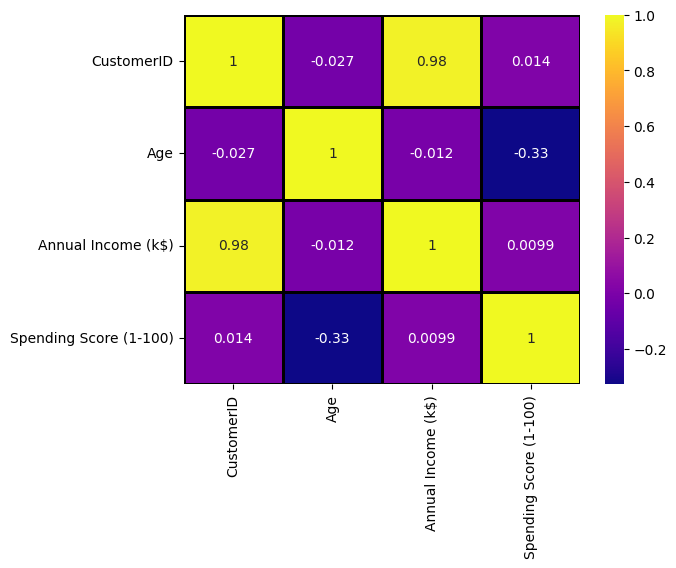

In [ ]:
sns.heatmap(tc, annot = True, cmap ='plasma',
linecolor ='black', linewidths = 1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df['cluster'], y_predicted)
print("Accuracy Score:", accuracy)

Accuracy Score: 1.0
